### Student Information
Name: 張禕紘

Student ID: 312707043

GitHub ID: 161785685

Kaggle name:Aron wei

Kaggle private scoreboard snapshot: 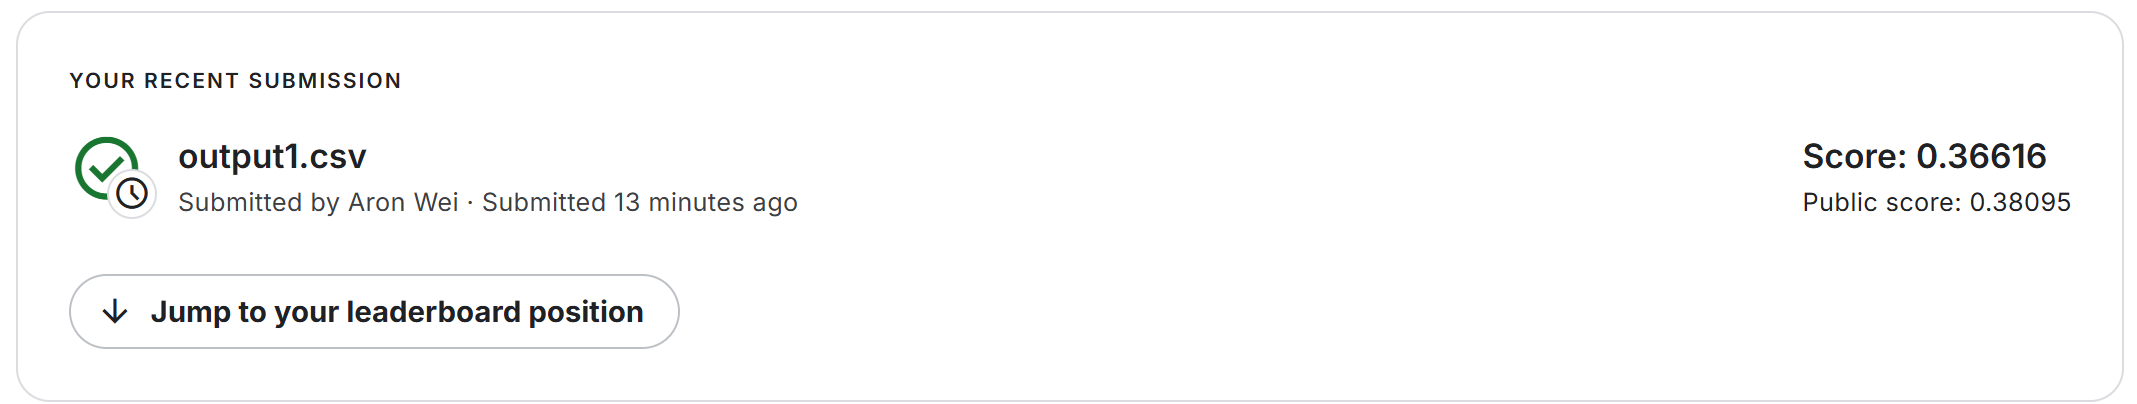

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

# exercise 1

In [ ]:
# exercise 1 做出BOW且找出frequency前30的並畫圖
# 設定清理stop words
from sklearn.feature_extraction.text import CountVectorizer

# 稀疏矩陣要記得toarray()
x_count=CountVectorizer(stop_words='english')
bow_train=x_count.fit_transform(train_df["text"])
feature_train=x_count.get_feature_names_out()
bow_train=pd.DataFrame(bow_train.toarray(),columns=feature_train)


temp=bow_train.sum(axis=0).sort_values(ascending=False)
temp=temp.nlargest(30)
plt.figure(figsize=(16,9))
plt.title("train set top 30 frequency words")
sns.barplot(x=temp.index,y=temp.values)
plt.xlabel("words")
plt.xticks(rotation=15)
plt.show()

bow_test=x_count.transform(test_df["text"])
feature_test=x_count.get_feature_names_out()
bow_test=pd.DataFrame(bow_test.toarray(),columns=feature_test)

temp=bow_test.sum(axis=0).sort_values(ascending=False)
temp=temp.nlargest(30)
plt.figure(figsize=(16,9))
plt.title("test set top 30 frequency words")
sns.barplot(x=temp.index,y=temp.values)
plt.xlabel("words")
plt.xticks(rotation=15)
plt.show()



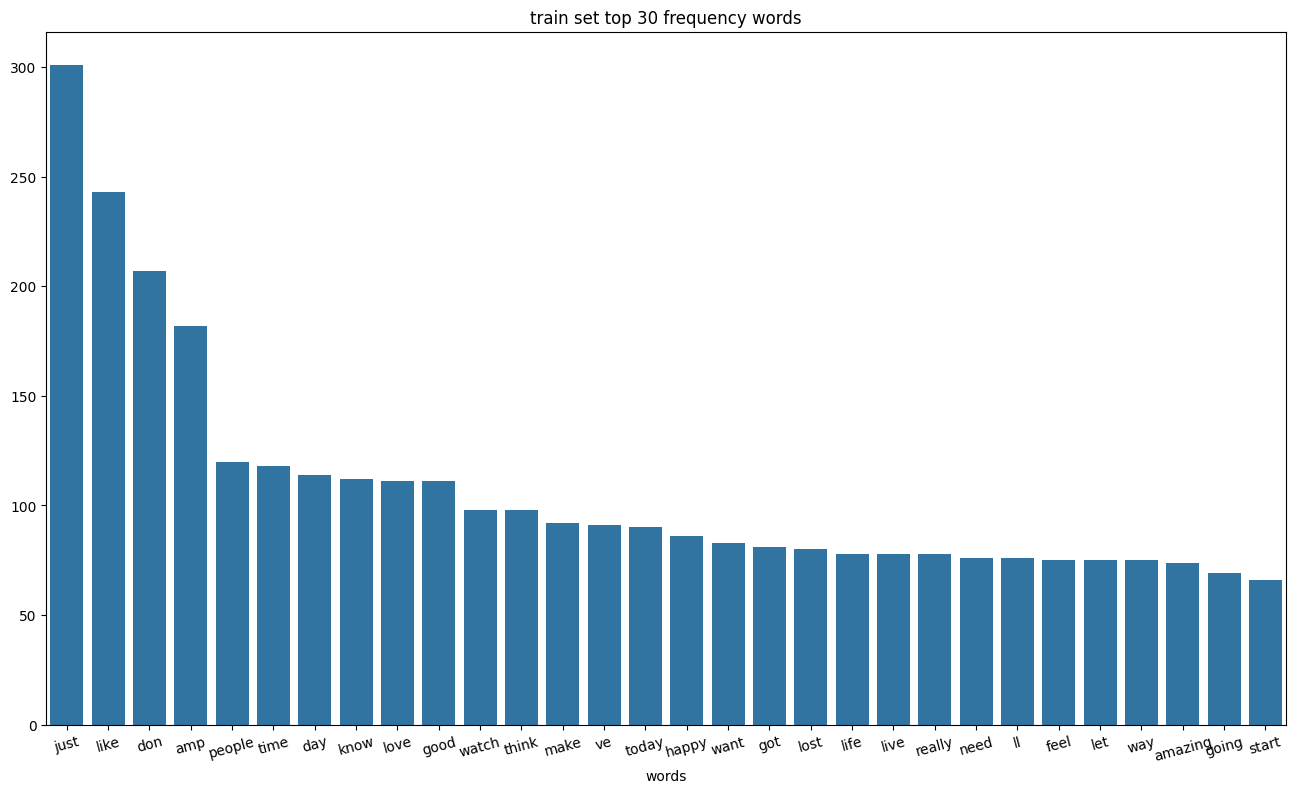

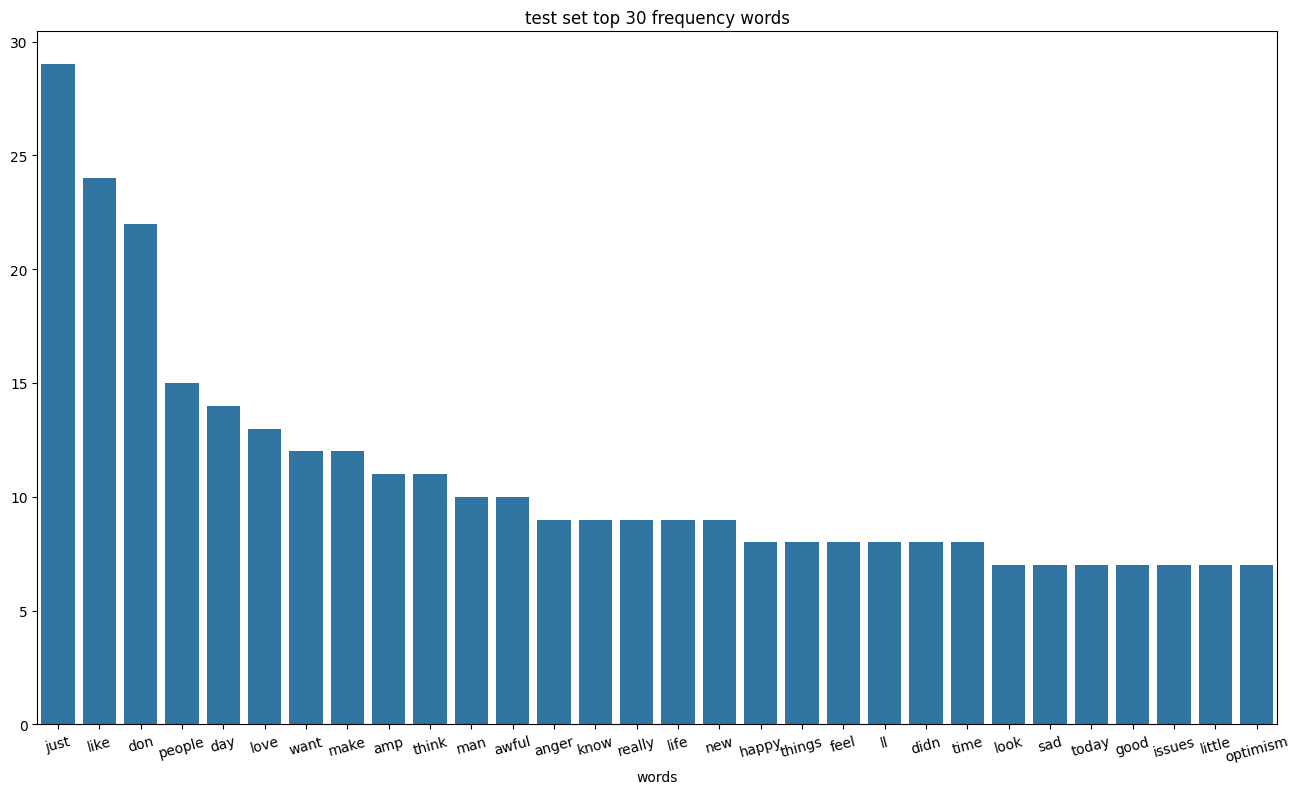

# exercise 2

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
tfidf_token=TfidfVectorizer(tokenizer=nltk.word_tokenize,max_features=1000)
tfidf_matrix=tfidf_token.fit_transform(train_df["text"]).toarray()
tfidf_token.get_feature_names_out()[100:110]

# exercise 3


There is a overfitting problem becauese the accuracy of training set is 99%,testing accuracy is 68%.  
The model fit training set is good, but in out of sample is too bad

# exercise 4


In [ ]:
import emoji

x_test = test_df["text"]
y_test = test_df['emotion']

# tokenizer=nltk.word_tokenize考慮表情符號，但會把標點符號視為一個特徵
def custom_tokenizer(text):
    tokens = nltk.word_tokenize(text)
    # 過濾掉標點符號，但保留表情符號
    filtered_tokens = [word for word in tokens if word not in string.punctuation or word in emoji.EMOJI_DATA]
    return filtered_tokens


x_count = CountVectorizer(tokenizer=custom_tokenizer,stop_words='english')
x_train = x_count.fit_transform(train_df['text'])
x_test = x_count.transform(test_df['text'])
x_train_df = pd.DataFrame(x_train.toarray(),columns=x_count.get_feature_names_out())
x_test_df = pd.DataFrame(x_test.toarray(),columns=x_count.get_feature_names_out())

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

y_train = train_df['emotion']
nb_model = MultinomialNB()
nb_model.fit(x_train_df, y_train)


In [ ]:
y_test_pred=nb_model.predict(x_test_df)
print(nb_model.score(x_train_df,y_train))
print(classification_report(y_test, y_test_pred))


In [ ]:
# output
# 0.976473844450595
#               precision    recall  f1-score   support

#        anger       0.81      0.73      0.77        84
#         fear       0.74      0.81      0.77       110
#          joy       0.79      0.82      0.81        79
#      sadness       0.74      0.70      0.72        74

#     accuracy                           0.77       347
#    macro avg       0.77      0.77      0.77       347
# weighted avg       0.77      0.77      0.77       347



# Exercise 5
 decision tree is using gini to find the imformation gain, and set the node depend on the information gain.
 naive bayse method suppose every features are identical, find the probability of every scenerio(y) and output the biggest one.
 naive bayse is  better than decision tree in this case.

# Exercise 6

In [ ]:

sns.lineplot(training_log,x="epoch",y="accuracy",label="train_accuracy")
sns.lineplot(training_log,x="epoch",y="val_accuracy",label="val_accuracy")
plt.legend()
plt.xticks(training_log.index)
plt.show()

sns.lineplot(training_log,x="epoch",y="loss",label="train_loss")
sns.lineplot(training_log,x="epoch",y="val_loss",label="val_loss")
plt.xticks(training_log.index)
plt.legend()
plt.show()

# We can see when epoch up to 2, loss in val is larger than train. It means that there is overfitting when epoch larger than 2. 

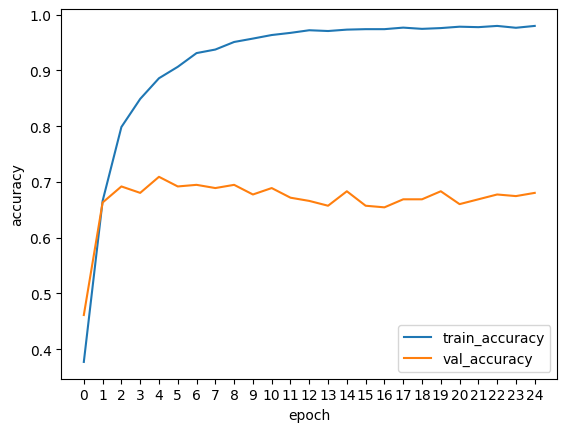

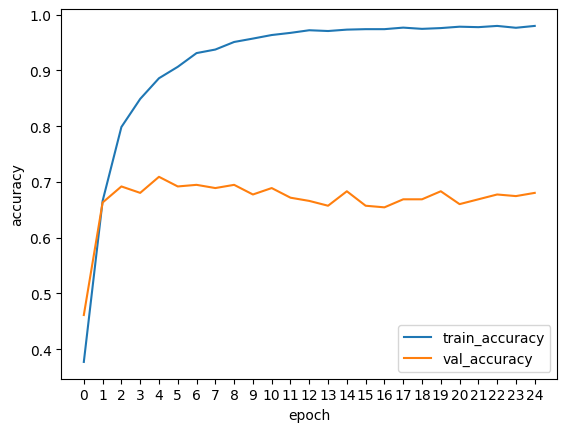

---
# Exercise 7 

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?  
也就是要把各個word vector整合轉換為sentence vector


### RNN
$$ h_t = f(W_h\cdot x_t + U_h \cdot h_{t-1} + b_h) $$


In [ ]:
# Use RNN model to let these words represent sentence
# notice: RNN need pretrained data. In sentence, we should do word embedding.
# 像 word2vec 把各個字的vector算出來，再用RNN把整個句子呈現
# 丟進去很多x，透過序列算法最終整合成一個h
# output 其實就是每個 hidden 序列下來的每個結果的紀錄
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence


## create the training corpus
# training_corpus = train_df['text_tokenized'].values
# training_corpus[:3]

temp_list=[]
lengths = []
for i in training_corpus:
    temp=np.zeros((len(i),vector_dim))
    for count,j in enumerate(i):
        temp[count]=word2vec_model.wv[j]      
    temp_list.append(temp)
    lengths.append(len(i))


max_length = max(lengths)  # 找到最長序列的長度
padded_sequences = np.zeros((len(temp_list), max_length, vector_dim), dtype=np.float32)  # 初始化填充矩陣
for i, seq in enumerate(temp_list):
    padded_sequences[i, :len(seq), :] = seq
padded_sequences
three_dim = np.stack(padded_sequences)
three_dim

sentence_vectors = torch.tensor(three_dim)  
rnn = nn.RNN(input_size=vector_dim, hidden_size=256, batch_first=True)  # hidden_size 為 RNN 輸出的維度
output, hidden = rnn(sentence_vectors)
hidden

In [ ]:
# output
# tensor([[[-0.0179, -0.1109, -0.1447,  ..., -0.0818,  0.0377, -0.0682],
#          [-0.0179, -0.1109, -0.1447,  ..., -0.0818,  0.0377, -0.0682],
#          [-0.0179, -0.1109, -0.1447,  ..., -0.0818,  0.0377, -0.0682],
#          ...,
#          [-0.0179, -0.1109, -0.1447,  ..., -0.0818,  0.0377, -0.0682],
#          [-0.0179, -0.1109, -0.1447,  ..., -0.0818,  0.0377, -0.0682],
#          [-0.0179, -0.1109, -0.1447,  ..., -0.0818,  0.0377, -0.0682]]],
#        grad_fn=<StackBackward0>)

# Exercise 8

In [ ]:
word_list = ['happy', 'angry', 'sac', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

target_words = happy_words + angry_words + data_words + mining_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

In [ ]:
# t-sne
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

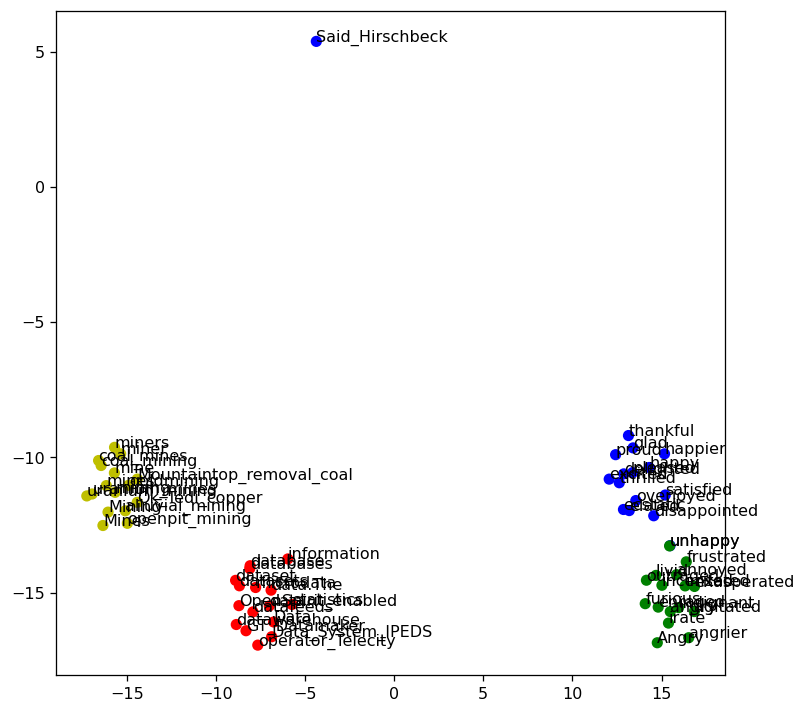

In [ ]:
# umap
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

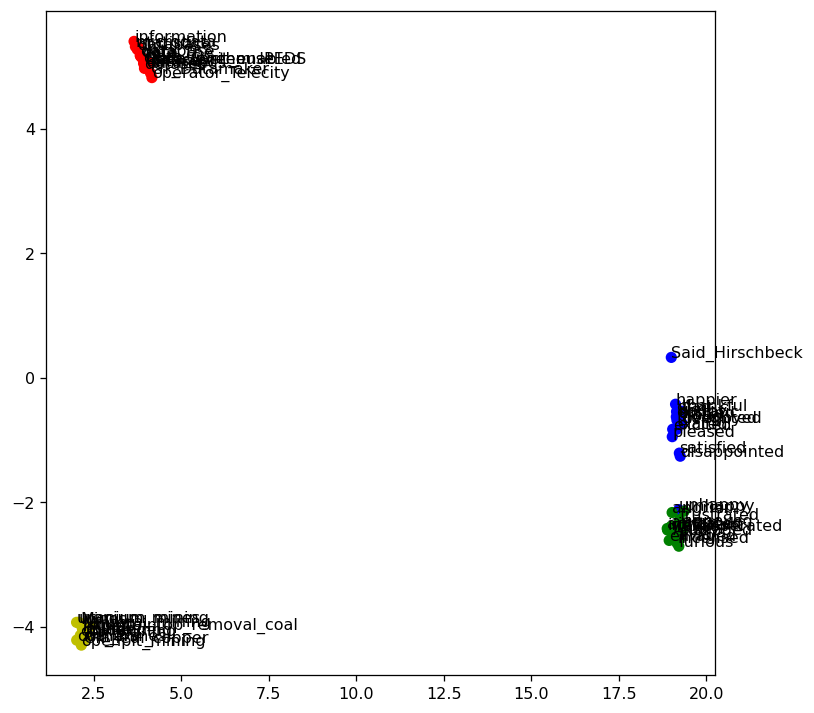

umap figure has higher density than t-sne.

# Exercise 9


You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [ ]:

response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'assistant',
        'content':'What is math? (in markdown format)'
    },
])

# print(response['message']['content'])
display(Markdown(response['message']['content']))

# ** Answer **  

# What is Math?

Mathematics, often simply referred to as math, is an intellectual field of study that encompasses a wide range of topics including numbers, quantities, shapes, patterns, and relationships between them.

## History of Mathematics

The history of mathematics dates back to ancient civilizations such as Egypt, Babylon, Greece, Rome, China, India and Arabia. The early development of mathematics was largely focused on practical problems in commerce, architecture, and engineering.

### Branches of Mathematics

Mathematics is a vast field with many branches that each study different aspects of numbers, shapes, patterns and relationships between them.

Some of the main branches include:

*   Algebra
*   Geometry
*   Trigonometry
*   Calculus

# Exercise 10

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [ ]:

response4 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['test3.jpg'] #Image with the stephen curry
    },
])

display(Markdown(response3['message']['content']))

# The picture is shown below

The image features a **ginger cat** lying on its side, comfortably nestled in the middle of a **beige carpeted floor**. The cat's gaze is directed towards the camera, giving an impression of curiosity or perhaps mild annoyance at being photographed. Its body, adorned with alternating light and dark stripes, contrasts beautifully with its vibrant fur color.

To the right of the cat, there's a **black bowl**. The bowl is empty but has some food particles clinging to it, suggesting recent use. It stands out against the beige carpet due to its dark color and cylindrical shape. 

The overall scene suggests a quiet domestic setting, possibly a living room or bedroom. The cat's relaxed posture indicates it feels safe and secure in this environment.

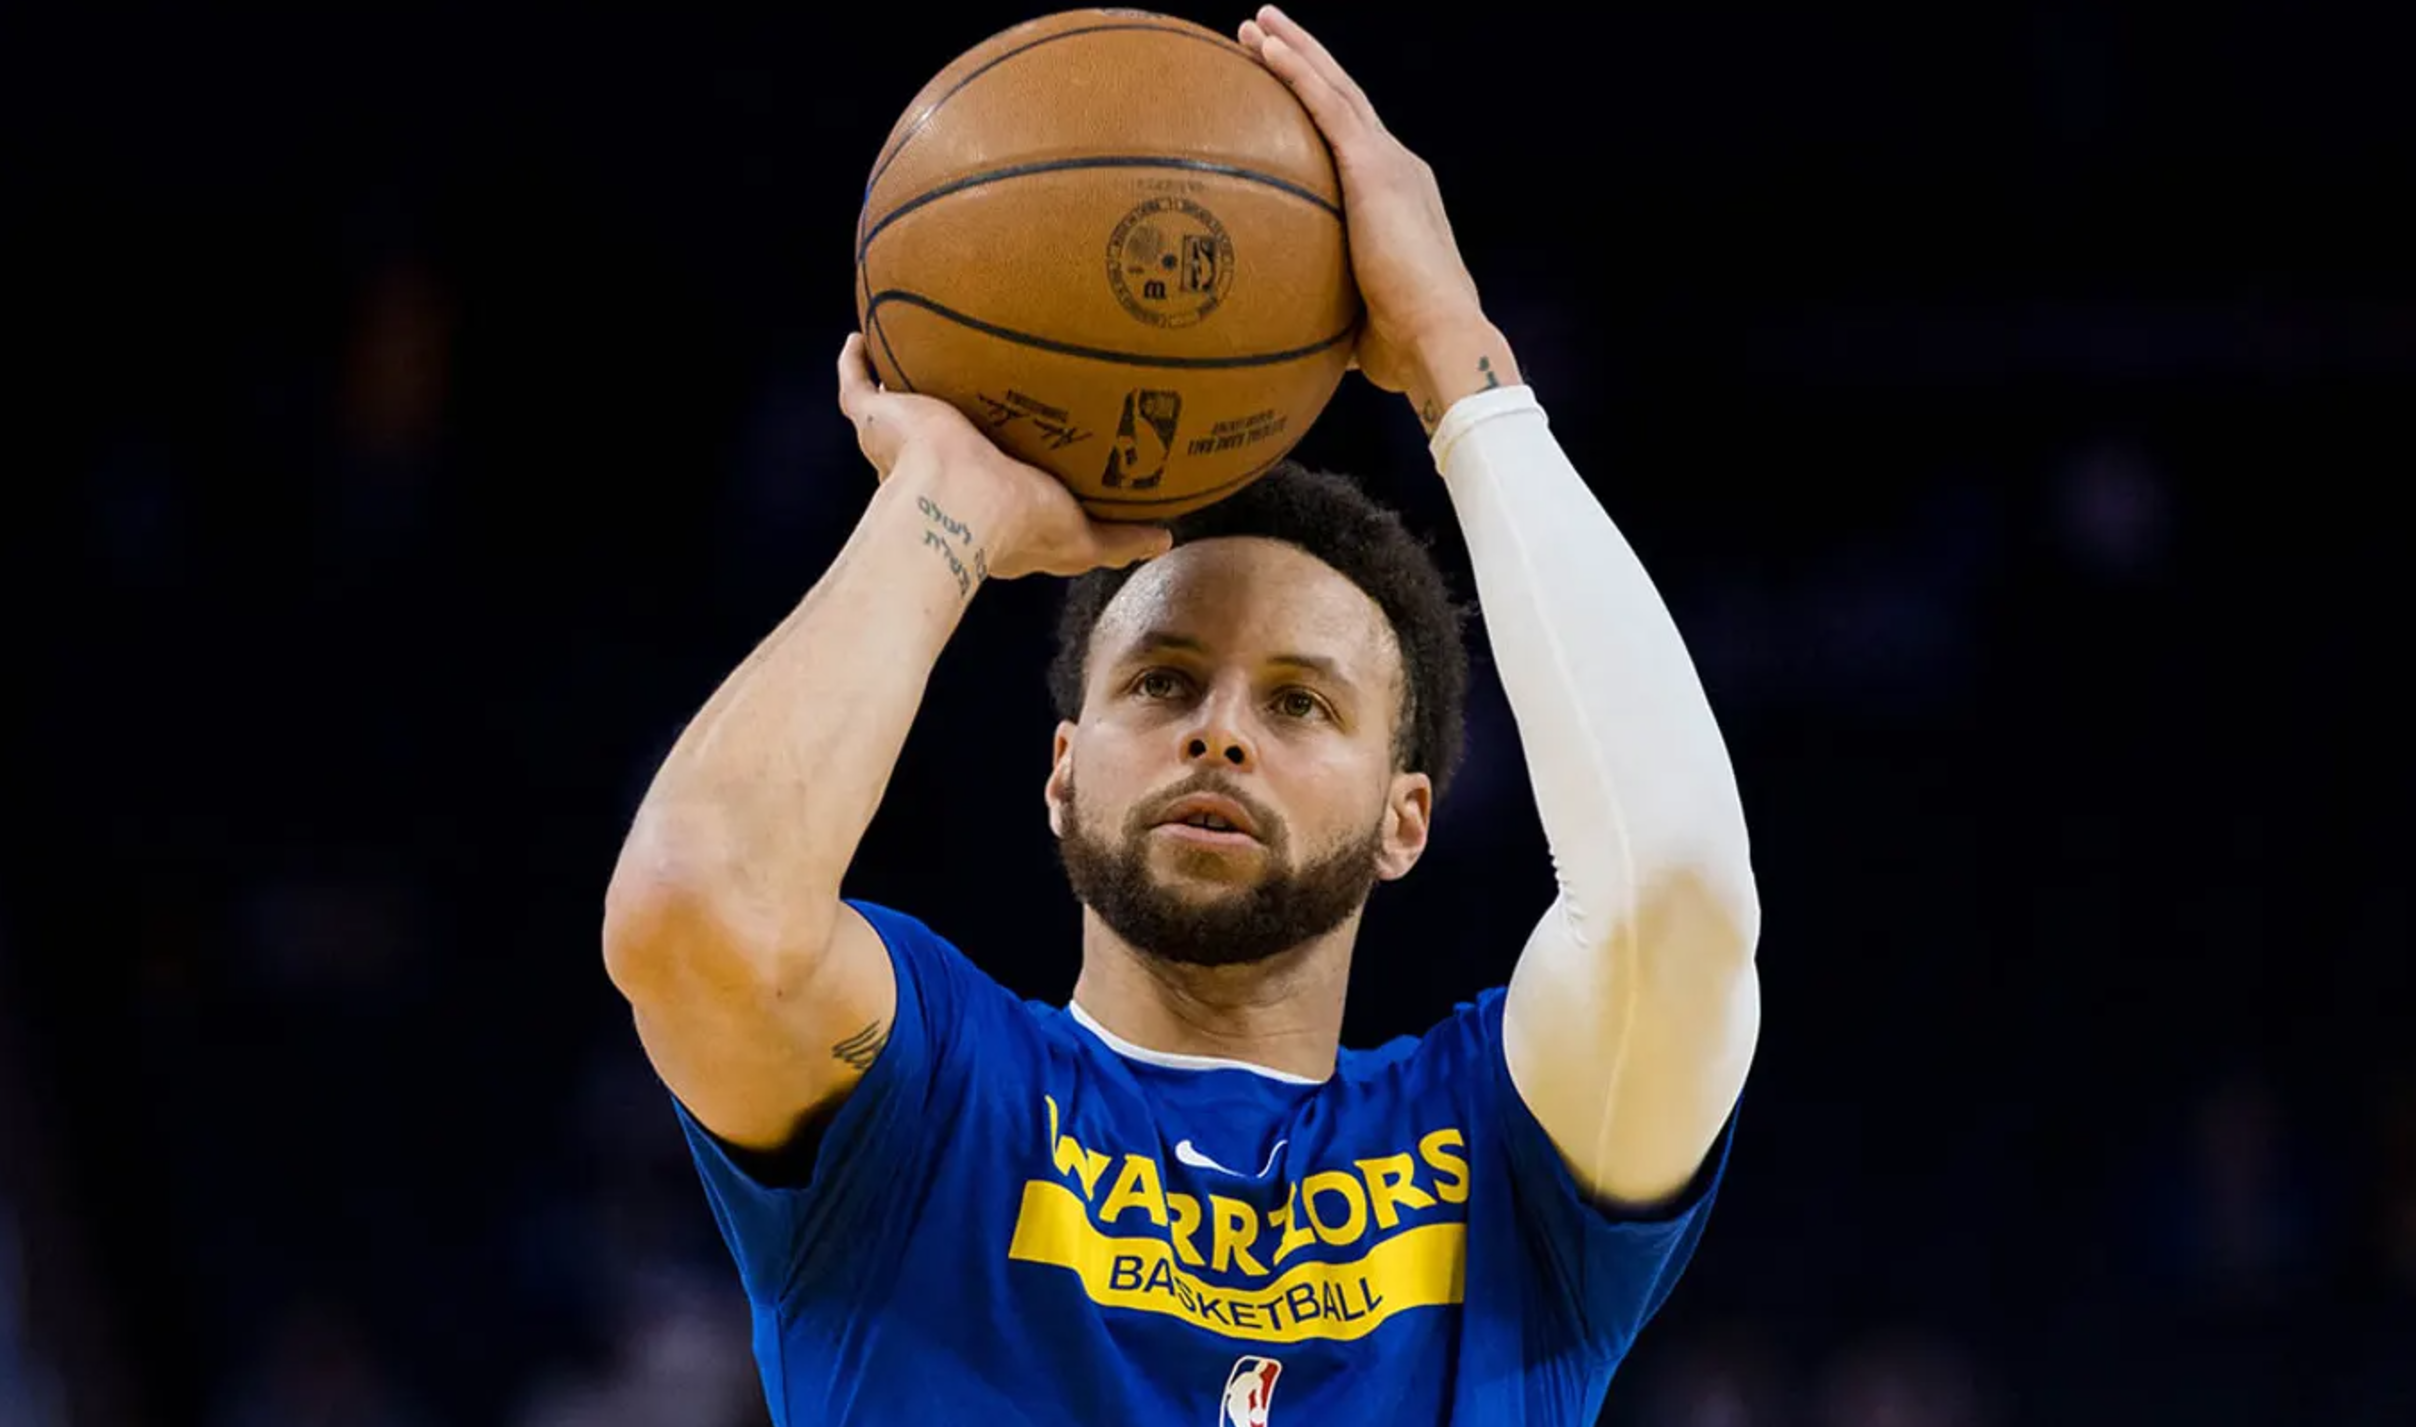

The description seems to be inaccurate, likely because the model lacks relevant data on basketball or human figures, making it unable to accurately interpret images that include these elements. 


# Exercise 11


Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [ ]:

# Define the LLM model
llm_model = "llama3.2"  # You can change to the one of your preference

# Function to load, split, and retrieve documents from multiple sources
def load_and_retrieve_docs(urls):
    all_docs = []
    for url in urls:
        loader = WebBaseLoader(
            web_paths=(url,),
            bs_kwargs=dict()
        )
        docs = loader.load()  # Load the URL as data source
        text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)  # Split text for vector comparison
        splits = text_splitter.split_documents(docs)
        all_docs.extend(splits)  # Combine documents from all URLs

    embeddings = OllamaEmbeddings(model=llm_model)  # Generate embeddings
    vectorstore = Chroma.from_documents(documents=all_docs, embedding=embeddings)  # Create vector space
    return vectorstore.as_retriever()

# URLs or text documents to process
urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://www.ibm.com/topics/instruction-tuning",
    "https://cloud.google.com/use-cases/retrieval-augmented-generation"
]

# Create the retriever
retriever = load_and_retrieve_docs(urls)

# Format retrieved documents for prompting
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Example questions based on the documents/URLs
questions = [
    "What are the related solutions of IBM with LLMs?",  # Related to IBM URL
    "Why we use instruction-tuning ",  # Related to instruction-tuning URL
    "Pros and cons with RAG"  # Related to RAG URL
]

# Use the RAG chain to answer questions
for question in questions:
    result = rag_chain(question)
    print(f"Question: {question}\nAnswer:\n{result}\n{'-' * 80}")


2024-12-06 19:58:35,447 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
Question: What are the related solutions of IBM with LLMs?
Answer:
IBM's related solutions with LLMs include:

1. Watsonx Assistant: Built on IBM's Granite model series, this product utilizes LLMs to provide human-like conversations and answers.
2. Watsonx Orchestrate: Another product built on the Granite model series, this solution leverages LLMs for various tasks such as content generation and language processing.

These solutions showcase IBM's investment in implementing LLMs at different levels to enhance natural language understanding (NLU) and natural language processing (NLP) capabilities.
--------------------------------------------------------------------------------
2024-12-06 19:59:16,098 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
Question: Why we use instruction-tuning 
Answer:
We use instruction tuning because it allows Large Language Models (LLMs) to learn how to respond to user requests and provide more accurate and informative responses. Instruction tuning is a supervised learning approach that involves training an LLM on labeled pairs of input/output examples, where the inputs are tasks that resemble user requests and the outputs demonstrate desirable responses.

The goal of instruction tuning is to enable the LLM to "learn" how to respond to prompts like "teach me how to bake bread" by generating actual advice for baking bread. By adjusting the model weights to make the LLM's outputs resemble the examples in the instruction dataset, the model can learn to generalize its understanding of instructions and provide more accurate responses across a range of tasks.

The benefits of instruction tuning include:

1. Improved performance on novel tasks: Adding additional tasks to the instruction tuning dataset has been shown to improve the model's performance even on tasks that were not represented in the original dataset.
2. Holistic improvement in the model's ability to follow instructions: Instruction tuning provides a comprehensive approach to training LLMs, enabling them to understand and respond to user requests more accurately.
3. Reduced dependence on proprietary datasets: By creating high-quality instruction datasets, researchers can reduce their reliance on proprietary models and promote model diversity.

However, there are also challenges associated with instruction tuning, including:

1. Creating high-quality instructions: Crafting suitable instructions requires significant resources and expertise.
2. Ensuring model diversity: The use of proprietary LLMs to generate instructions can lead to decreased model diversity, as these models often reinforce the biases and shortcomings of human researchers.
3. Evaluating performance: Assessing the performance of smaller models using proprietary LLMs can be problematic, as it may mask inherent biases in the larger models.

Overall, instruction tuning offers a promising approach to improving the performance and generalizability of LLMs, but further research is needed to address the challenges associated with this technique.
--------------------------------------------------------------------------------
2024-12-06 19:59:53,716 : INFO : HTTP Request: POST http://127.0.0.1:11434/api/chat "HTTP/1.1 200 OK"
Question: Pros and cons with RAG
Answer:
RAG is a tool that enables managers to track and analyze infrastructure usage across multiple projects and teams. Here are some pros and cons of using RAG:

Pros:

1. **Centralized dashboard**: RAG provides a centralized platform for managers to monitor and analyze infrastructure usage, making it easier to identify trends and anomalies.
2. **Real-time visibility**: Managers can gain real-time visibility into infrastructure usage, enabling them to respond quickly to changes or issues.
3. **Improved collaboration**: RAG facilitates collaboration between teams by providing a common platform for tracking and analyzing infrastructure usage.
4. **Reduced downtime**: By identifying potential issues before they occur, managers can take proactive steps to prevent downtime and ensure high availability of critical resources.
5. **Cost optimization**: RAG helps managers optimize costs by identifying underutilized or unused resources, allowing them to right-size their infrastructure.

Cons:

1. **Steep learning curve**: Managers may need time to learn how to effectively use RAG's features and tools.
2. **Data complexity**: RAG generates a significant amount of data, which can be challenging for managers to process and analyze.
3. **False positives and negatives**: With so much data, there is a risk of false positives (inaccurate readings) or false negatives (missed issues).
4. **Over-reliance on automation**: Managers may become too reliant on RAG's automated features, rather than developing their own skills and knowledge.
5. **Integration challenges**: Integrating RAG with existing tools and systems can be complex, requiring significant time and effort.

Overall, RAG offers many benefits for managers looking to optimize infrastructure usage and improve collaboration between teams. However, it also requires careful consideration of its limitations and potential pitfalls to ensure effective use.
--------------------------------------------------------------------------------


# Exercise 12

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

In [ ]:

sns.lineplot(training_log,x="epoch",y="accuracy",label="train_accuracy")
sns.lineplot(training_log,x="epoch",y="val_accuracy",label="val_accuracy")
plt.legend()
plt.xticks(training_log.index)
plt.show()

sns.lineplot(training_log,x="epoch",y="loss",label="train_loss")
sns.lineplot(training_log,x="epoch",y="val_loss",label="val_loss")
plt.xticks(training_log.index)
plt.legend()
plt.show()


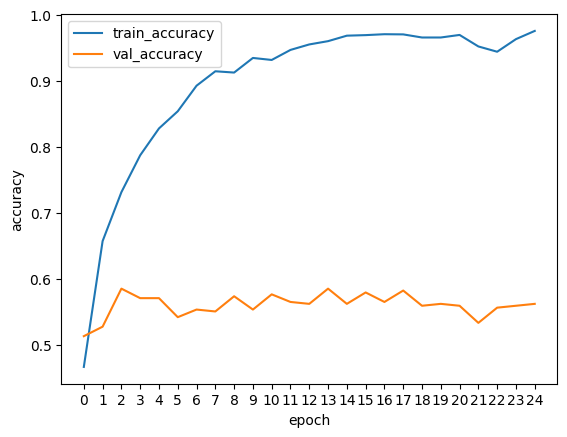

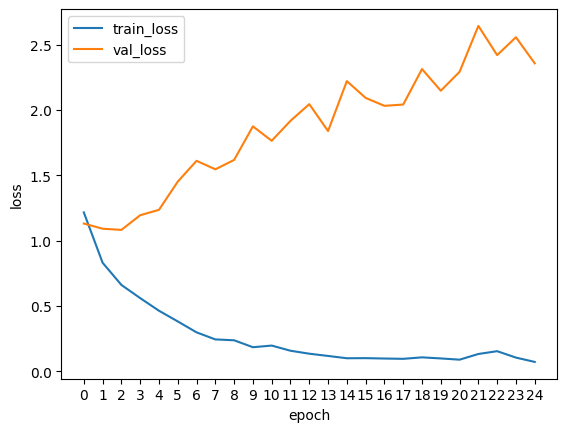

We have three type of model to fit:  
1.Use decision tree with BOW pretrain  
testing accuracy: 0.68    
2.Use KNN with LLM Embeddings  
testing Accuracy: 0.458    
3.Use NN with LLM Embeddings  
testing accuracy: 0.56  
In this figure, we know that if epoch larger than 0, val_loss is larger than train_loss. It means there is overfitting. This problem that the LLM Embeddings method worse than only BOW transform.

In this example, I understand that a more complex model is not always more accurate. Sometimes, a simple model can provide a better solution than a complex one. It is important to choose an appropriate model to address our problem.

# Exercise 13 

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

Answer : We use n-shot classification to help us achieve accurate classifications. If n getting larger, the model will response more accurate. But it cost more computing source and time. So if we want this model reply a general question, using 0-shot is a better way than 5-shot. If we want know a specific field, using 5-shot is a better choice than 0-shot.